<a href="https://colab.research.google.com/github/Vanessa0ne/phyton/blob/main/HISTOGRAFIA_CON_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#matplotlib

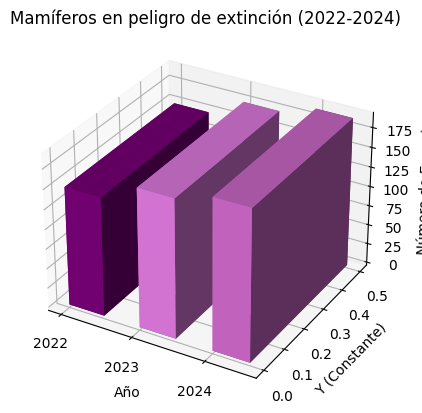

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Datos de ejemplo: cantidad de especies en peligro de extinción por año
years = np.array([2022, 2023, 2024])
endangered_species = np.array([150, 175, 190])

# Crear figura y gráfico en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Posiciones de las barras en el eje X
x_pos = np.arange(len(years))

# Altura de las barras
y_pos = np.zeros(len(years))  # Inicio en el eje Y
z_pos = endangered_species  # Altura de las barras

# Ancho y profundidad de las barras
dx = dy = 0.5

# Colores: morado y rosado
colors = ['purple', 'violet', 'orchid']

# Crear barras 3D
ax.bar3d(x_pos, y_pos, np.zeros_like(z_pos), dx, dy, z_pos, color=colors)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Y (Constante)')
ax.set_zlabel('Número de Especies')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.set_title('Mamíferos en peligro de extinción (2022-2024)')

# Mostrar gráfico
plt.show()


#Para crear un geomapa animado que muestre la distribución de mamíferos en peligro de extinción a nivel mundial, podemos usar bibliotecas como geopandas, matplotlib, y folium. Sin embargo, para animaciones más complejas, podríamos utilizar Plotly o matplotlib.animation. Aquí te doy un ejemplo básico de cómo puedes visualizar un geomapa con animación usando Plotly para los datos de mamíferos en peligro de extinción en diferentes años.

Paso 1: Instalar las bibliotecas necesarias
Primero, asegúrate de tener instaladas las bibliotecas necesarias:

In [2]:
pip install geopandas plotly pandas

In [3]:
import plotly.express as px
import pandas as pd

# Datos de ejemplo: ubicación geográfica de mamíferos en extinción con coordenadas
data = {
    'Nombre': ['Tigre', 'Oso Polar', 'Elefante Africano', 'Panda', 'Jaguar'],
    'Latitud': [20.5937, 66.1605, -1.9403, 35.8617, -9.189967],
    'Longitud': [78.9629, -153.3691, 29.8739, 104.1954, -75.0152],
    'Año': [2022, 2022, 2023, 2024, 2024],
    'Cantidad': [1200, 2500, 1500, 1800, 700]  # Cantidad de mamíferos en extinción
}

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Crear geomapa animado usando Plotly
fig = px.scatter_geo(df,
                     lat='Latitud',
                     lon='Longitud',
                     color='Nombre',
                     size='Cantidad',
                     hover_name='Nombre',
                     animation_frame='Año',
                     projection='natural earth',
                     title='Distribución mundial de mamíferos en peligro de extinción (2022-2024)',
                     color_continuous_scale=px.colors.sequential.Purples)

# Mostrar mapa
fig.show()


#Para crear un geomapa 3D de alta definición con imágenes satelitales y superponer los datos de animales en peligro de extinción a nivel mundial, podemos usar herramientas como Plotly y Kepler.gl (para visualizaciones geoespaciales avanzadas) o CesiumJS para vistas 3D interactivas. Sin embargo, crear un mapa completamente en 3D con fotografías satelitales y superposición de animales en peligro de extinción requiere recursos geoespaciales más avanzados.

Voy a mostrarte cómo podrías implementar un geomapa interactivo en 3D con datos geoespaciales usando Pydeck o Kepler.gl en Python. Para las imágenes satelitales de fondo, utilizaríamos servicios como Mapbox.

Paso 1: Instalar las Bibliotecas Necesarias

In [26]:
pip install pydeck keplergl pandas geopandas


#Paso 2: Código para el Geomapa 3D
Este ejemplo usa pydeck para crear un mapa 3D con datos de animales en peligro de extinción, superpuesto sobre una vista de fotografías satelitales de Mapbox.

In [31]:
# Instalar pydeck y pandas si no están instalados en Google Colab
!pip install pydeck pandas

import pydeck as pdk
import pandas as pd

# Configurar tu Mapbox API Token
mapbox_api_token = "sk.your_mapbox_api_token_here"  # Reemplaza con tu token real

# Estilo de Mapa Personalizado de Mapbox (en este caso, satélite)
map_style = "mapbox://styles/mapbox/satellite-v9"  # Puedes usar tu propio estilo personalizado de Mapbox Studio

# Datos de ejemplo: Ubicaciones de mamíferos en peligro de extinción
data = pd.DataFrame({
    'Nombre': ['Tigre', 'Oso Polar', 'Elefante Africano', 'Panda', 'Jaguar'],
    'Latitud': [20.5937, 66.1605, -1.9403, 35.8617, -9.189967],
    'Longitud': [78.9629, -153.3691, 29.8739, 104.1954, -75.0152],
    'Cantidad': [1200, 2500, 1500, 1800, 700]  # Cantidad de mamíferos en extinción
})

# Configurar el token de Mapbox globalmente
pdk.settings.deckgl_mapbox_api_key = mapbox_api_token

# Crear capa de puntos con pydeck
layer = pdk.Layer(
    'ScatterplotLayer',
    data,
    get_position='[Longitud, Latitud]',
    get_color='[200, 30, 0, 160]',  # Color rojo semitransparente
    get_radius=200000,  # Tamaño del círculo basado en la cantidad de animales
    pickable=True
)

# Configurar la vista inicial
view_state = pdk.ViewState(
    latitude=0,
    longitude=0,
    zoom=1.5,
    pitch=50,
)

# Crear el mapa en 3D con el estilo satélite
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    map_style=map_style,  # Usar el estilo satelital
    tooltip={"text": "{Nombre}\nCantidad: {Cantidad}"}
)

# Guardar el mapa como un archivo HTML
r.to_html('animales_extincion_3d_temperatura.html')

# Descargar el archivo HTML para abrirlo en un navegador
from google.colab import files
files.download('animales_extincion_3d_temperatura.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Para utilizar imágenes satelitales de Google Earth en un mapa 3D interactivo en Python, debes tener en cuenta que Google Earth no permite integrarse directamente con herramientas como pydeck o Mapbox debido a restricciones de uso y licencias. Sin embargo, hay alternativas que te permiten visualizar datos satelitales de Google Earth, como el uso de folium o la API de Google Maps.

A continuación, te muestro un ejemplo utilizando la API de Google Maps para mostrar imágenes satelitales y superponer datos de animales en peligro de extinción. Aunque este enfoque no es en 3D, sí permite mostrar imágenes satelitales de Google en un mapa interactivo.

Paso 1: Instalar las Bibliotecas Necesarias

In [12]:
pip install folium pandas


#Paso 2: Obtener una API Key de Google Maps
Necesitarás una API key de Google Maps para usar imágenes satelitales de Google. Puedes obtenerla en el Google Cloud Console.

Paso 3: Código para Crear un Mapa con Imágenes Satelitales de Google Earth
Aquí te muestro cómo puedes implementar un mapa con imágenes satelitales de Google Earth usando folium y superponer datos de animales en peligro de extinción.

In [16]:
import folium
import pandas as pd

# Datos de ejemplo: Ubicaciones de mamíferos en peligro de extinción
data = pd.DataFrame({
    'Nombre': ['Tigre', 'Oso Polar', 'Elefante Africano', 'Panda', 'Jaguar'],
    'Latitud': [20.5937, 66.1605, -1.9403, 35.8617, -9.189967],
    'Longitud': [78.9629, -153.3691, 29.8739, 104.1954, -75.0152],
    'Cantidad': [1200, 2500, 1500, 1800, 700]  # Cantidad de mamíferos en extinción
})

# Configurar el centro del mapa
m = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain',
               attr='Map tiles by <a href="http://stamen.com">Stamen Design</a>, <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a> &mdash; Map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')
# Added attribution for Stamen Terrain

# Agregar imágenes satelitales de Google Maps
google_satelite = folium.TileLayer(
    tiles='http://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=True,
    control=True
).add_to(m)

# Agregar marcadores para cada especie en peligro de extinción
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"{row['Nombre']}<br>Cantidad: {row['Cantidad']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('animales_extincion_google_earth.html')

In [15]:
!pip install folium


In [17]:
import folium
import pandas as pd
from IPython.display import display

# Datos de ejemplo: Ubicaciones de mamíferos en peligro de extinción
data = pd.DataFrame({
    'Nombre': ['Tigre', 'Oso Polar', 'Elefante Africano', 'Panda', 'Jaguar'],
    'Latitud': [20.5937, 66.1605, -1.9403, 35.8617, -9.189967],
    'Longitud': [78.9629, -153.3691, 29.8739, 104.1954, -75.0152],
    'Cantidad': [1200, 2500, 1500, 1800, 700]  # Cantidad de mamíferos en extinción
})

# Crear el mapa centrado en el mundo
m = folium.Map(location=[0, 0], zoom_start=2, tiles=None)

# Agregar imágenes satelitales de Google Maps
google_satelite = folium.TileLayer(
    tiles='http://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=True,
    control=True
).add_to(m)

# Agregar marcadores para cada especie en peligro de extinción
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"{row['Nombre']}<br>Cantidad: {row['Cantidad']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Mostrar el mapa en Colab
m
